### Este notebook exemplo utiliza [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) para formatação do texto, e [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Mathematics) para criação de fórmulas matemáticas.

**9.7** - Digitadores são treinados em uma empresa em duas turmas
distintas. Na primeira, denominada Turma J, utiliza-se um método
japonês de ensino, ao passo que na segunda turma, denominada
Turma A, utiliza-se um método alemão. Dezesseis (16) alunos de
cada turma foram escolhidos aleatoriamente e uma mesma tarefa
foi atribuída a cada uma. Apesar de desconhecida as variâncias
populacionais são consideradas iguais com base em estudos
anteriores. Os métodos diferem quanto ao tempo de execução da
tarefa? Conclua com $\alpha = 0.01$.

**1** - Estabelecer as hipóóteses nula e alternativa:

$H_0: \mu_x = \mu_y$

$H_a: \mu_x \neq \mu_y$

$\bar{D} = \bar{X} - \bar{Y}$

In [ ]:
import numpy as np

# turma j
x = np.array([10, 13, 9, 10, 14, 13, 10, 15, 12, 10, 9, 10, 13, 14])
# turma a
y = np.array([15, 12, 18, 16, 15, 17, 17, 15, 16, 17, 11, 17, 14])

In [ ]:
y

array([15, 12, 18, 16, 15, 17, 17, 15, 16, 17, 11, 17, 14])

In [ ]:
x

array([10, 13,  9, 10, 14, 13, 10, 15, 12, 10,  9, 10, 13, 14])

In [ ]:
x.mean()

11.571428571428571

In [ ]:
x.std()

1.9897697538834456

In [ ]:
x-x.mean()

array([-1.57142857,  1.42857143, -2.57142857, -1.57142857,  2.42857143,
        1.42857143, -1.57142857,  3.42857143,  0.42857143, -1.57142857,
       -2.57142857, -1.57142857,  1.42857143,  2.42857143])

In [ ]:
(x-x.mean())**2

array([ 2.46938776,  2.04081633,  6.6122449 ,  2.46938776,  5.89795918,
        2.04081633,  2.46938776, 11.75510204,  0.18367347,  2.46938776,
        6.6122449 ,  2.46938776,  2.04081633,  5.89795918])

In [ ]:
sum((x-x.mean())**2)

55.42857142857142

In [ ]:
sum((x-x.mean())**2)/(len(x)-1)

4.263736263736264

In [ ]:
np.sqrt(sum((x-x.mean())**2)/(len(x)-1))

2.064881658530644

In [ ]:
np.sqrt(sum((x-x.mean())**2)/len(x))

1.9897697538834456

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x7f49acf6a9d0>,
 [Text(0, 0, 'J'), Text(0, 0, 'A')])

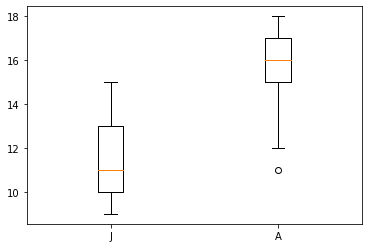

In [ ]:
plt.boxplot([x, y])
plt.xticks([1, 2], ['J', 'A'])

**2** - Definir a forma da região crítica, com base na hipótese alternativa.

$RC = \{ t \in R \mid t < -t_c \quad ou \quad t > t_c\}$

**3** - Identificar a distribuição do estimador e obter sua estimativa.

In [ ]:
n_x = len(x)
n_y = len(y)
print("n_x:", n_x, "n_y:", n_y)

n_x: 14 n_y: 13


In [ ]:
d_obs = x.mean()-y.mean()
s2x = sum((x-x.mean())**2)/(len(x)-1)
s2y = sum((y-y.mean())**2)/(len(y)-1)

s2c_obs = ((n_x-1)*s2x+(n_y-1)*s2y)/((n_x-1)+(n_y-1))

print("Média:", d_obs)
print("Variância comum:", s2c_obs)

Média: -3.813186813186814
Variância comum: 4.2602197802197805


**4** - Fixar o $\alpha$ e obter a região críítica.

$t_{n_x-1+n_y-1} = t_{25}$

$t_{obs} = \frac{\bar{d}_{obs}-\mu_D}{\sqrt{S^2_{c_{obs}} \times (1/n_x+1/n_y)}}$

In [ ]:
t_obs = (d_obs-0)/np.sqrt(s2c_obs*(1/n_x+1/n_y))
print("t observado:", t_obs)

t observado: -4.796515940785071


**5** - Concluir o teste com base na estimativa e na região crítica.

In [ ]:
from scipy import stats

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
tdist = stats.t(25)

In [ ]:
tdist.ppf(0.995)

2.787435813675851

In [ ]:
# Calcular o t-test apropriado pela biblioteca scipy
stats.ttest_ind(x, y)

Ttest_indResult(statistic=-4.796515940785071, pvalue=6.313275155202227e-05)

In [ ]:
stats.ttest_ind(y, x)

Ttest_indResult(statistic=4.796515940785071, pvalue=6.313275155202227e-05)

In [ ]:
print('pvalue=', 2*tdist.cdf(t_obs))

pvalue= 6.313275155202227e-05


In [ ]:
stats.ttest_rel(y, x)[1]/2

2.0973016297226766e-05